In [1]:
%matplotlib inline

import h5py
import numpy as np
from matplotlib import pyplot as plt
import torch
from data import transforms as T

In [5]:
file = "data/singlecoil_train/file1000001.h5"
hf = h5py.File(file, "r")

In [6]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']
Attrs: {'norm': 0.0596983310320022, 'max': 0.000851878253624366, 'patient_id': '0beb8905d9b7fad304389b9d4263c57d5b069257ea0fdc5bf7f2675608a47406', 'acquisition': 'CORPDFS_FBK'}


In [7]:
def forward_helper(kspace):
    if not torch.is_tensor(kspace):
        kspace_tensor = T.to_tensor(kspace)
    else:
        kspace_tensor = kspace
    image = T.ifft2(kspace_tensor)
    print(image.dtype, image.shape)
    image_abs = T.complex_abs(image)
    return image, image_abs

torch.float32 torch.Size([640, 372, 2])
torch.float32 torch.Size([640, 372, 2])


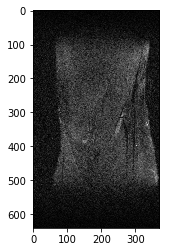

In [8]:
kspace =hf['kspace'][34]
img, img_abs = forward_helper(kspace)
print(img.dtype, img.shape)
plt.imshow(img_abs, cmap="gray")

In [131]:
T.to_tensor(np.fft.fft2(img_abs.numpy())).dtype

torch.float64

In [116]:
def X_operator(img):
    kspace = 1j * (img[...,1].numpy())
    kspace += (img[...,0].numpy())
    print(kspace.dtype, kspace.shape)
    kspace2 = T.to_tensor(kspace)
    new_kspace = T.fft2(kspace2) 
    print(new_kspace.dtype, new_kspace.shape)
    return new_kspace

complex64 (640, 368)
torch.float32 torch.Size([640, 368, 2])
torch.float32 torch.Size([640, 368, 2])
torch.float32 torch.Size([640, 368, 2]) torch.float32 torch.Size([640, 368])


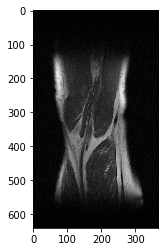

In [118]:
new_kspace = X_operator(img)
img, img_abs = forward_helper(new_kspace)
print(img.dtype, img.shape, img_abs.dtype, img_abs.shape)
plt.imshow(img_abs, cmap="gray")

In [107]:
def gramian_helper(img):
    kspace = X_operator(img)
    new_img, new_img_abs = forward_helper(kspace)
    return new_img, new_img_abs

torch.float32 torch.Size([640, 368, 2])
complex64 (640, 368)
torch.float32 torch.Size([640, 368, 2])
torch.float32 torch.Size([640, 368, 2])
torch.float32 torch.Size([640, 368, 2])


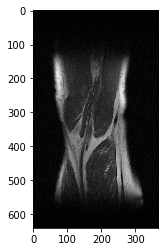

In [108]:
kspace =hf['kspace'][34]
img, img_abs = forward_helper(kspace)
img, img_abs = gramian_helper(img)
print(img.dtype, img.shape)
plt.imshow(img_abs, cmap="gray")

In [29]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)
slice_kspace = volume_kspace[20]
print(slice_kspace.dtype, slice_kspace.shape)

complex64
(35, 640, 368)
complex64 (640, 368)


In [26]:
def show_slices(data, slice_nums, cmap=None):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data, cmap=cmap)

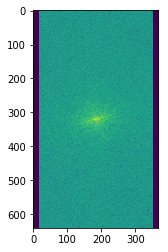

In [27]:
show_slices(np.log(np.abs(slice_kspace) + 1e-9), [0])  # This shows slices 0, 5 and 10

In [28]:
slice_kspace2 = T.to_tensor(slice_kspace)      # Convert from numpy array to pytorch tensor
print(slice_kspace2.dtype, slice_kspace2.shape)
slice_image = T.ifft2(slice_kspace2)           # Apply Inverse Fourier Transform to get the complex image
slice_image_abs = T.complex_abs(slice_image)
slice_image_abs.shape

torch.float32 torch.Size([640, 368, 2])


torch.Size([640, 368])

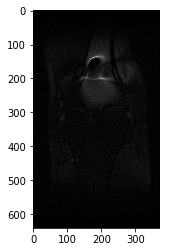

In [18]:
show_slices(slice_image_abs, [0], cmap='gray')